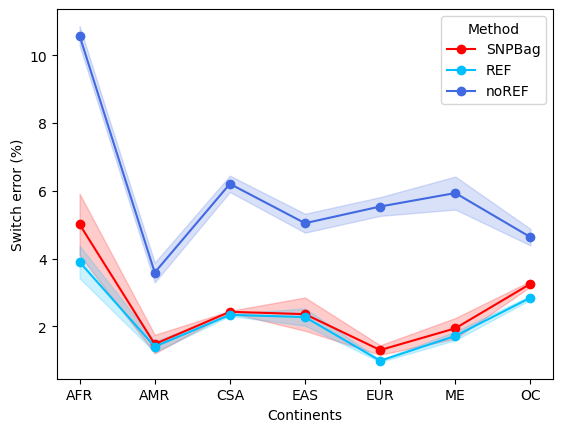

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_all = pd.read_csv('dat/all_acc.txt', sep='\t')
df_all['error'] = 100 - df_all['acc'] * 100

# Group by continents and method, calculate mean, std, and count
df_grouped = df_all.groupby(['continents', 'ref'], as_index=False).agg(
    error_count=('error', 'count'),
    error_mean=('error', 'mean'),
    error_std=('error', 'std'),
    error_se=('error', 'sem'),
    # error_ci=('error', 'ci'),
)

# Specify method order
ref_order = ['SNPBag', 'REF', 'noREF']

# Specify colors for each method
palette = {
    'SNPBag': 'red',
    'REF': 'deepskyblue',
    'noREF': 'royalblue',
}

# Only use colors for methods present in the data and in the specified order
present_refs = [m for m in ref_order if m in df_grouped['ref'].unique()]
palette = {k: v for k, v in palette.items() if k in present_refs}

# Plot with shadow (fill_between) for standard error in the specified order
fig, ax = plt.subplots()
for ref in present_refs:
    sub = df_grouped[df_grouped['ref'] == ref]
    # Ensure continents are sorted consistently
    continents = sub['continents']
    error_mean = sub['error_mean']
    error_se = sub['error_se']
    color = palette.get(ref, None)
    # Plot mean line
    ax.plot(continents, error_mean, marker='o', label=ref, color=color, linestyle='-')
    # Plot shadow (standard error)
    ax.fill_between(
        continents,
        error_mean - error_se,
        error_mean + error_se,
        color=color,
        alpha=0.2
    )

ax.set_xlabel('Continents')
ax.set_ylabel('Switch error (%)')
ax.legend(title='Method')
plt.savefig('switch_error_continents.pdf', bbox_inches='tight')
plt.show()
plt.close()
